ใส่ course_id ข้างล่าง (code camp #7 = 14766)

In [43]:
course = 14766

ตารางที่ต้องใช้มีดังนี้

wp_posts , wp_tutor_quiz_attempt_answers , wp_tutor_quiz_attempts , wp_users

โดยเก็บตารางในรูปของไฟล์ .csv

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

โค้ดข้างล่างสร้างตารางเก็บผู้เรียน ในแต่ละ course

In [44]:
course_mem = pd.read_csv('table/wp_posts.csv')
course_mem = course_mem[course_mem['post_type'] == 'tutor_enrolled']
#course_mem.drop_duplicates(subset = ['course_id' , 'quiz_id' , 'user_id'], keep = 'first' ,inplace = True)
course_mem = course_mem[['post_author','post_parent','post_status']]
course_mem = course_mem[course_mem['post_status'] == 'completed']
course_mem.drop_duplicates(keep = 'first' ,inplace = True)
course_mem = course_mem[['post_author','post_parent']]
course_mem_num = course_mem['post_parent'].value_counts()
course_mem_num = course_mem_num.sort_index()
#course_mem_num

โค้ดข้างล่างสร้างตาราง quiz_student เก็บผู้เรียนที่ส่ง quiz

quiz_num เก็บจำนวนผู้เรียนที่ส่งของแต่ละ quiz

In [42]:
quiz_student = pd.read_csv('table/wp_tutor_quiz_attempt_answers.csv')
quiz_student = quiz_student[['quiz_id','user_id']]
quiz_student.drop_duplicates(inplace = True)
quiz_student.sort_values("quiz_id", inplace = True)
quiz_student = quiz_student.reset_index(drop = True)
#print(quiz_student)
quiz_num = quiz_student['quiz_id'].value_counts()
quiz_num = quiz_num.sort_index()
#print(quiz_num)

โค้ดข้างล่างสร้างตาราง first_attempt เก็บการส่ง quiz ครั้งแรกของแต่ละผู้เรียนในแต่ละ quiz

user เก็บ ID และ ชื่อที่แสดงของผู้เรียน

In [32]:
first_attempt = pd.read_csv('table/wp_tutor_quiz_attempts.csv')
first_attempt.drop_duplicates(subset = ['course_id' , 'quiz_id' , 'user_id'], keep = 'first' ,inplace = True)
user = pd.read_csv('table/wp_users.csv')
user = user[['ID','display_name']]
user

,ID,display_name
0,2,Mehedi Hasan
1,4,hideoaki
2,5,pairin kaewkuay
3,7,Rattanakorn Tungputtaruck
4,9,Pradit Tongprasit
...,...,...
818,825,BENCHAMARD KONGIM
819,826,Rat.Lee
820,827,สุทธินัย เสียงใส
821,828,Sutthinai Seangsai


โค้ดข้างล่างสร้างตาราง course_quiz เก็บรายชื่อ quiz ของแต่ละ course

In [33]:
course_quiz = first_attempt.copy()
course_quiz = course_quiz[['course_id' , 'quiz_id']]
course_quiz.drop_duplicates( keep = 'first' ,inplace = True)
#course_quiz

โค้ดข้างล่างจะทำการสร้างกราฟคะแนนของ quiz ที่เลือก โดยใส่ quiz_id ในตัวแปร select_quiz บรรทัดแรก

โดยจะแสดงจำนวนผู้เรียนที่สง quiz จากผู้เรียนทั้งหมดในคอร์ส คะแนนเต็ม คะแนนเฉลี่ย เปอร์เซ็นต์ไทล์ที่ 25 50 และ 75 ผู้เรียนที่ส่งงานคนแรกและคนล่าสุด

**แสดงเฉพาะคะแนนการส่งคำตอบครั้งแรกของแต่ละ quiz เท่านั้น

summited student = 28 / 140
max = 24.0
mean = 18.89
percentile 25 = 18.5
percentile 50 = 22.0
percentile 75 = 23.0
first attempted by wiwat_43 at 2020-04-27 01:44:31
last attempted by natchapol at 2020-06-14 08:58:10


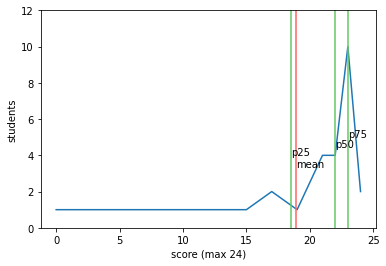

In [34]:
select_quiz = 9561
quiz_table = first_attempt[first_attempt['quiz_id'] == select_quiz ]
quiz_table = quiz_table.reset_index(drop = True)
quiz_table = quiz_table[['attempt_id' , 'user_id' , 'total_marks' , 'earned_marks' , 'attempt_ended_at']]
quiz_table = quiz_table.dropna().reset_index()
#print(quiz_table)
f = quiz_table['user_id']
a = list(quiz_table['earned_marks'])

asd = list(quiz_table['user_id'])
sd = []
#print(len(a))
#print(len(asd))
#print(asd)
for i in asd:
    if i in a:
        sd.append(i)
    #else:
        #print(str(i) + ' not in course')
#print(len(sd))

for i in sd:
    quiz_table = quiz_table[quiz_table['user_id'] != i]
    
quiz_table = quiz_table.reset_index()
#print(quiz_table)
a = list(quiz_table['earned_marks'])
#print(a)
max_s = course_mem_num[course_quiz[course_quiz['quiz_id'] == select_quiz].iloc[0]['course_id']]
print('summited student = ' + str(len(a)) + ' / ' + str(max_s))
max = quiz_table['total_marks'].max()
print('max = '+str(max))
mean = round(sum(a) / len(a),2)
print('mean = ' + str(mean))
b25 = np.percentile(a,25)
b50 = np.percentile(a,50)
b75 = np.percentile(a,75)
print('percentile 25 = '+str(b25))
print('percentile 50 = '+str(b50))
print('percentile 75 = '+str(b75))
print('first attempted by ' + user[user['ID'] == quiz_table.iloc[0]['user_id']].iloc[0]['display_name'] + ' at '+str(quiz_table.iloc[0]['attempt_ended_at']))
print('last attempted by ' + user[user['ID'] == quiz_table.iloc[-1]['user_id']].iloc[0]['display_name'] + ' at '+str(quiz_table.iloc[-1]['attempt_ended_at']))
vc = quiz_table['earned_marks'].value_counts()
vc = vc.sort_index()
#print(vc)
plt.plot(vc)
plt.axvline(mean, ymin = 0 , ymax = 1 , c=(255/255, 100/255, 100/255), alpha=1)
plt.text(mean, vc.max() / 3, 'mean')
plt.axvline(b50, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
plt.text(b50, vc.max() / 2.25, 'p50')
plt.axvline(b25, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
plt.text(b25, vc.max() / 2.5, 'p25')
plt.axvline(b75, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
plt.text(b75, vc.max() / 2, 'p75')
plt.xlabel('score (max '+str(int(max)) + ')')
plt.ylabel('students')
plt.ylim(0,vc.max()+2)
plt.show()

โค้ดข้างล่างจะทำการสร้างกราฟคะแนนของแต่ละ quiz ใน course ที่เลือก โดยใส่ course_id ในตัวแปร course บรรทัดแรก

โดยจะแสดงจำนวนผู้เรียนทั้งหมดใน course และแสดงผลของ quiz แต่ละตัวในคอร์ส โดยจะบอกคะแนนเต็ม และจำนวนผู้เรียนที่ส่ง quiz นั้นๆต่อผู้เรียนทั้งหมดในคอร์ส

**แสดงเฉพาะคะแนนการส่งคำตอบครั้งแรกของแต่ละ quiz เท่านั้น

course id : 14766
total student = 29
quiz no.9561
summited student = 28 / 29
max score = 24.0
-------------------------------------------------------------------
quiz no.9628
summited student = 22 / 29
max score = 55.0
-------------------------------------------------------------------
quiz no.9882
summited student = 23 / 29
max score = 9.0
-------------------------------------------------------------------
quiz no.9872
summited student = 22 / 29
max score = 5.0
-------------------------------------------------------------------
quiz no.9887
summited student = 21 / 29
max score = 5.0
-------------------------------------------------------------------
quiz no.9885
summited student = 22 / 29
max score = 14.0
-------------------------------------------------------------------
quiz no.9888
summited student = 19 / 29
max score = 6.0
-------------------------------------------------------------------
quiz no.9890
summited student = 19 / 29
max score = 5.0
------------------------------------

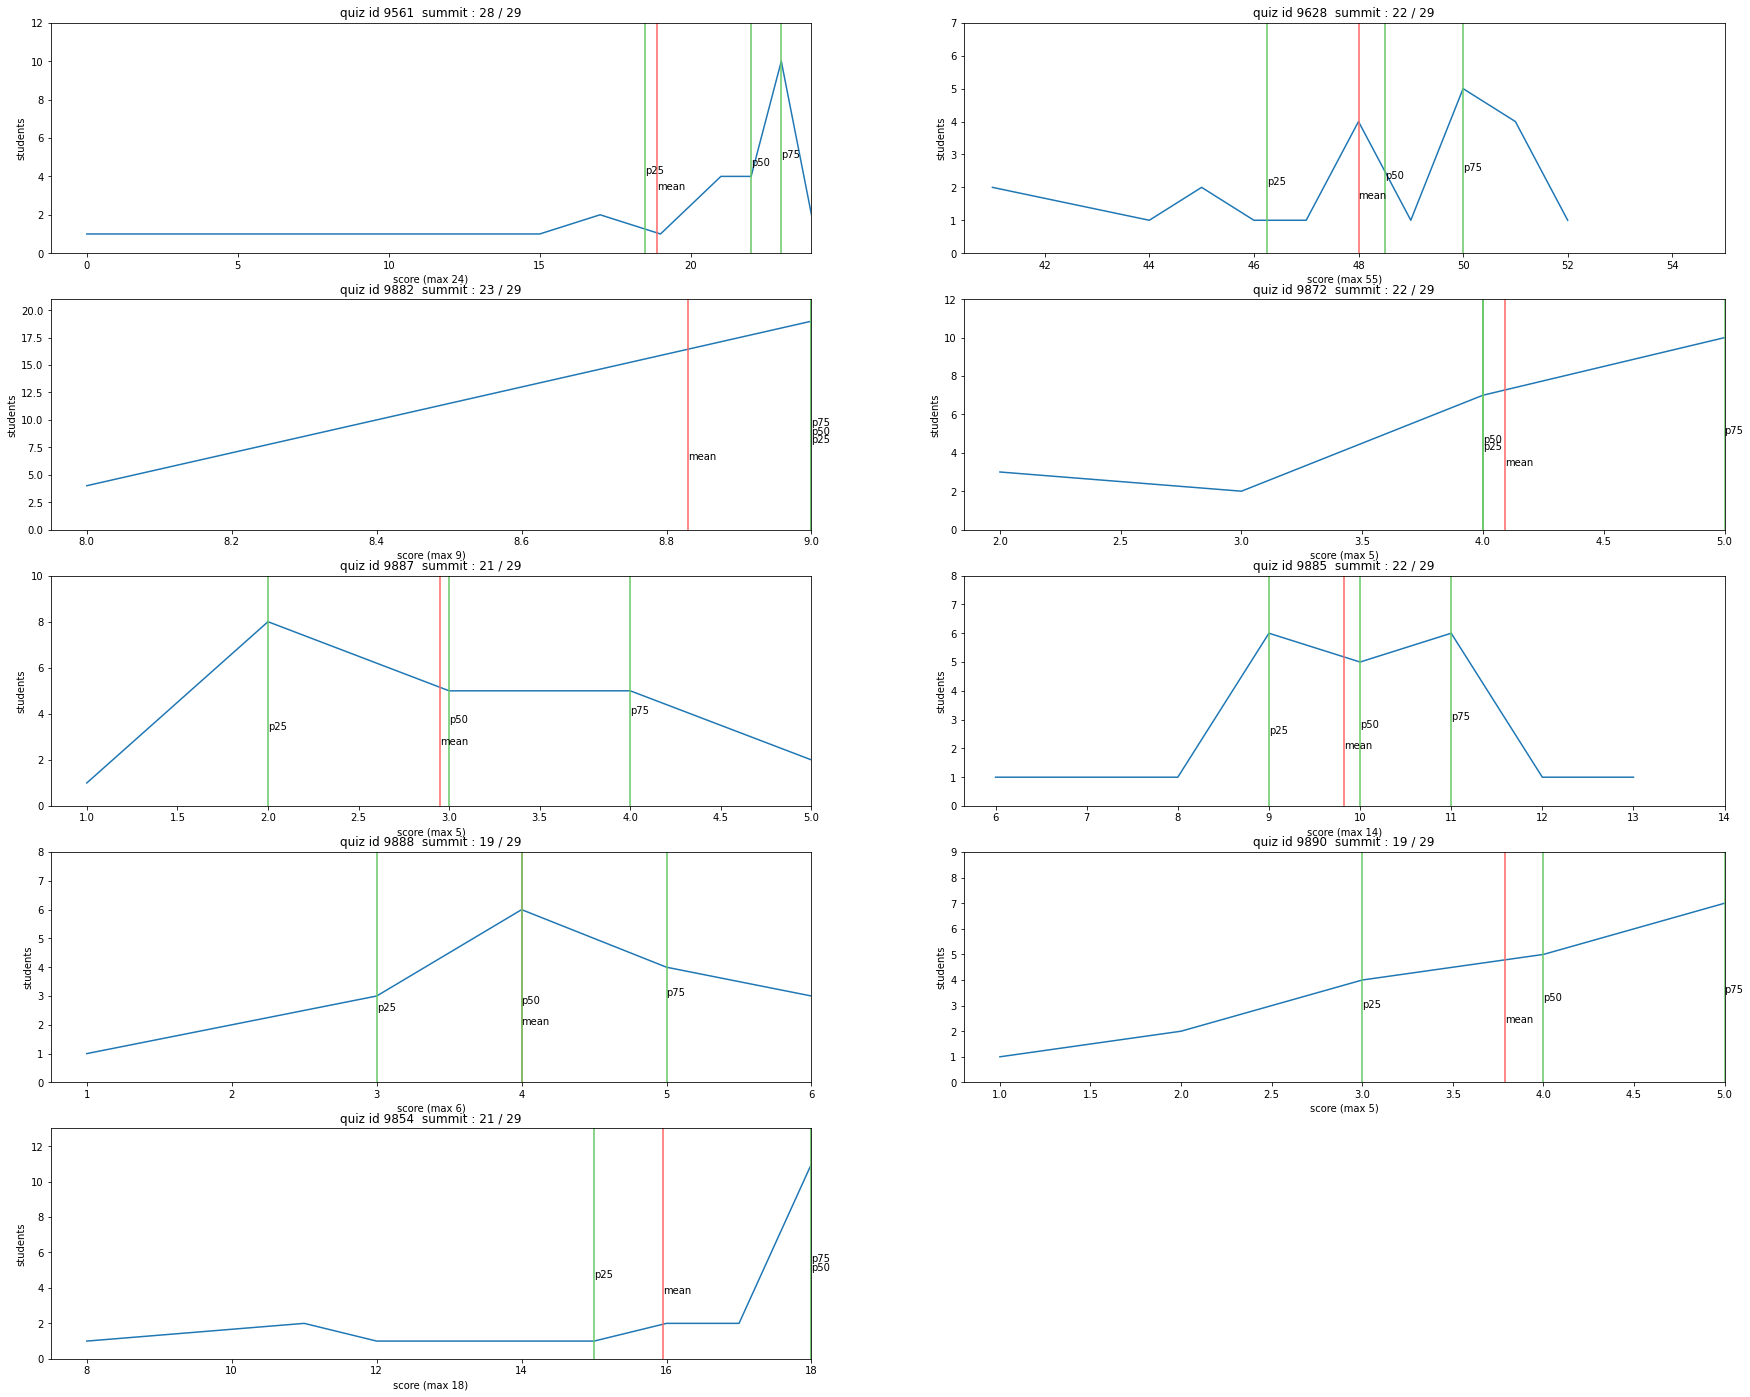

In [35]:
#course = 14766
fig = plt.figure(figsize=(30, 50))
c_list = list(course_quiz[course_quiz['course_id'] == 7313]['quiz_id'])
print('course id : '+str(course))
max_s = course_mem_num[course]
print('total student = ' + str(course_mem_num[course]))
n= 1
for i in range (0,len(c_list)):
    ax = fig.add_subplot(10,2,i+1)
    
    select_quiz = c_list[i]
    quiz_table = first_attempt[first_attempt['quiz_id'] ==select_quiz ]
    quiz_table = quiz_table.reset_index(drop = True)
    quiz_table = quiz_table[['attempt_id' , 'user_id' , 'total_marks' , 'earned_marks' , 'attempt_ended_at']]
    quiz_table = quiz_table.dropna().reset_index()
    a = list(quiz_table['earned_marks'])
    
    asd = list(quiz_table['user_id'])
    sd = []
    #print(len(a))
    #print(len(asd))
    #print(asd)
    for k in asd:
        if k in a:
            sd.append(k)
        #else:
            #print(str(i) + ' not in course')
    #print(len(sd))
    #print(sd)

    for o in sd:
        quiz_table = quiz_table[quiz_table['user_id'] != o]

    quiz_table = quiz_table.reset_index()
    #print(quiz_table)
    
    
    print('quiz no.'+str(c_list[i]))
    a = list(quiz_table['earned_marks'])
    print('summited student = ' + str(len(a)) + ' / ' + str(max_s))
    m = quiz_table['total_marks'].max()
    print('max score = '+str(m))
    mean = round(sum(a) / len(a),2)
    b25 = np.percentile(a,25)
    b50 = np.percentile(a,50)
    b75 = np.percentile(a,75)
    
    vc = quiz_table.copy()['earned_marks'].value_counts()
        
    vc = vc.sort_index()
    ax.plot(vc)
    ax.axvline(mean, ymin = 0 , ymax = 1 , c=(255/255, 100/255, 100/255), alpha=1)
    ax.text(mean, vc.max() / 3, 'mean')
    ax.axvline(b50, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
    ax.text(b50, vc.max() / 2.2, 'p50')
    ax.axvline(b25, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
    ax.text(b25, vc.max() / 2.4, 'p25')
    ax.axvline(b75, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
    ax.text(b75, vc.max() / 2, 'p75')
    ax.set_xlim(right = m)
    ax.set_title('quiz id ' +str(c_list[i]) + '  summit : ' + str(len(a)) + ' / ' + str(max_s))
    ax.set_xlabel('score (max '+str(int(m)) + ')')
    ax.set_ylabel('students')
    ax.set_ylim(0,vc.max()+2)
    print('-------------------------------------------------------------------')
plt.show()

In [36]:
#c_list เก็บลิสต์ quiz ในคอร์ส
#print(c_list)
quiz_student_in_course = quiz_student[quiz_student['quiz_id'].isin(c_list)]
quiz_student_in_course_vc = quiz_student_in_course['user_id'].value_counts()
most_submit_userid = quiz_student_in_course_vc[quiz_student_in_course_vc == quiz_student_in_course_vc.max()]
#print(most_submit_userid)
msu_list = list(most_submit_userid.index)
#print(msu_list)
print('users with most quiz submission ('+str(quiz_student_in_course_vc.max()) + ' submission) :')
print('-------------------------------')
for i in msu_list:
    name = user[user['ID'] == i].iloc[0]['display_name']
    print(name)
print('-------------------------------')

users with most quiz submission (9 submission) :
-------------------------------
Thanawat J.
KradasA4
FALLENSLAYER007
taresupakon
jane
Wittayasakpan
Kalyssa
isaphuyuthanon
Chonlani oiwan
iq1234
Patteera
xittichai
Teerapat Prommarak
Kard Sahaphong
Chawintee Muennarong
sadliver
Danusorn Chuensanguan
-------------------------------


In [37]:
print('course ' + str(course) + ' has total quiz : ' + str(len(c_list)))
#print(quiz_student)
quiz_uc = quiz_student_in_course.drop('quiz_id',1)
quiz_uc = quiz_uc['user_id'].value_counts()
#print(quiz_uc)
quiz_u = quiz_uc.value_counts().sort_index(ascending=False)
#print(quiz_u)
print('number of quiz submited : number of students')
#print('---------------------')
for i in quiz_u.index:
    print(str(i) +   '   :   ' + str(quiz_u[i]) )
    #print(str(quiz_u[i]) +  ' students have ' + str(i) + ' quiz done')
print('total submited student = ' +str(quiz_u.sum()))
print('-------------------------')
print('top 10')

least_quiz = round(len(c_list)*0.8)
#print(least_quiz)
quiz_uca = quiz_uc[quiz_uc >= least_quiz]
#print(quiz_uca)
qucal = list(quiz_uca.index)
#print(qucal)
sum_s = pd.DataFrame(columns=['user_id', 'score'])
#print(sum_s)
n = 0
for i in qucal:
    score_list = []
    for j in c_list:
        quiz_t = first_attempt[first_attempt['quiz_id'] == j ]
        quiz_t = quiz_t.reset_index(drop = True)
        quiz_t = quiz_t[['attempt_id' , 'user_id' , 'total_marks' , 'earned_marks' , 'attempt_ended_at']]
        quiz_t = quiz_t.dropna().reset_index()
        quiz_t = quiz_t[quiz_t['user_id'] == i]
        #print(len(quiz_t.index))
        if (quiz_t.index.size > 0):
            b = quiz_t.iloc[0]['earned_marks']
            score_list.append(b)
            #print(b)
    #print(b)
    #print(score_list)
    sum_score = sum(score_list)
    #print(sum_score)
    df = pd.DataFrame([[i, sum_score]], columns=['user_id', 'score'])
    #print(df)
    sum_s = sum_s.append(df, ignore_index=True)
    #print(sum_s)
    
    n = n+1
#print(sum_s)
sum_s = sum_s.sort_values( 'score', ascending=False)
sum_s = sum_s.reset_index()
#print(sum_s)

for i in range(10):
    ID = sum_s.iloc[i]['user_id']
    name = user[user['ID'] == ID].iloc[0]['display_name']
    print('#'+str(i+1)+'\t' + str(int(sum_s.iloc[i]['score'])) + ' point'+'\t'+ name )
    

course 14766 has total quiz : 9
number of quiz submited : number of students
9   :   17
8   :   2
7   :   1
6   :   2
4   :   1
1   :   5
total submited student = 28
-------------------------
top 10
#1	133 point	KradasA4
#2	130 point	xittichai
#3	128 point	Thanawat J.
#4	128 point	Kard Sahaphong
#5	127 point	FALLENSLAYER007
#6	127 point	taresupakon
#7	125 point	Chawintee Muennarong
#8	125 point	iq1234
#9	121 point	sadliver
#10	121 point	Teerapat Prommarak


In [38]:
print('total student in course = ' + str(course_mem_num[course]))

total student in course = 29


ข้างล่างเป็น code ทดสอบครับ ไม่ต้องใส่ใจ

In [39]:
a = course_mem[course_mem['post_parent'] == course]
print(a)
a = a.drop('post_parent',1)
print(a)
a = list(a['post_author'])
print(a)
#print(c_list)
#print(quiz_student_in_course)
b = quiz_student_in_course
b = b.drop('quiz_id',1)
print(b['user_id'])
vb = b['user_id'].value_counts()
print(vb)
print(vb.value_counts())
#b.drop_duplicates(inplace = True)
#b= b.reset_index()


      post_author  post_parent
2117          752        14766
2118          753        14766
2119          754        14766
2120          755        14766
2121          757        14766
2125          760        14766
2126          758        14766
2127          761        14766
2130          763        14766
2144          767        14766
2146          769        14766
2149          771        14766
2154          773        14766
2156          774        14766
2161          779        14766
2162          780        14766
2163          781        14766
2164          783        14766
2165          255        14766
2177          787        14766
2185          370        14766
2191          805        14766
2199          811        14766
2209          817        14766
2211           20        14766
2214          815        14766
2215          819        14766
2227          826        14766
2228          827        14766
      post_author
2117          752
2118          753
2119          75

In [40]:
asd = list(f)
sd = []
print(len(a))
print(len(asd))
print(asd)
for i in asd:
    if i in a:
        sd.append(i)
    else:
        print(str(i) + ' not in course')
print(len(sd))

29
29
[338, 316, 485, 113, 187, 278, 91, 334, 33, 129, 309, 207, 310, 19, 205, 330, 332, 40, 333, 93, 172, 376, 275, 50, 105, 214, 662, 87, 391]
338 not in course
316 not in course
485 not in course
113 not in course
187 not in course
278 not in course
91 not in course
334 not in course
33 not in course
129 not in course
309 not in course
207 not in course
310 not in course
19 not in course
205 not in course
330 not in course
332 not in course
40 not in course
333 not in course
93 not in course
172 not in course
376 not in course
275 not in course
50 not in course
105 not in course
214 not in course
662 not in course
87 not in course
391 not in course
0


user_id 19 not in wp_users , but appear in quiz summited